/home/keshavsingh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/keshavsingh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/keshavsingh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[array([-0.00013295,  0.00016767,  0.00126296, -0.0010014 , -0.00015754,
       -0.0002873 ,  0.00076863, -0.00137885, -0.00095683, -0.00094269,
        0.00003277, -0.00072089, -0.00131441,  0.00065947,  0.00117825,
       -0.00078342, -0.00014872,  0.00071243,  0.00003071,  0.00010517,
        0.00176274,  0.00111615, -0.00132952, -0.0012241 , -0.00156628,
       -0.00152379, -0.00092825,  0.00042064, -0.00107604,  0.0000479 ,
       -0.00056652,  0.00046817, -0.00041676,  0.00078541,  0.00001701,
        0.00167437, -0.00018893, -0.00098191,  0.000914  , -0.00023128,
       -0.00124309,  0.00191137,  0.00014134, -0.00191679, -0.00125119,
       -0.00055866,  0.00086891, -0.00052446,  0.00053153,  0.0001334 ,
        0.0003852 ,  0.00007734,  0.0010544 , -0.00065362, -0.00114291,
        0.00201257,  0.00006831,  0.00014745,  0.00076266, -0.00117825,
        0.00061159,  0.00020329,  0.00068689, -0.00270335,  0.00059554,
        0.00033729,  0.00032786, -0.00035021,  0.00140459,  0.0

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.00743646895849
Silhouette_score: 
0.0504856
2 ['\ufeffcasino', 'is', 'reason', 'that', 'people', 'gamble', 'and', 'lose', 'their', 'savings']
2 ['losing', 'their', 'life', 'savings', 'there', 'shouldnt', 'be', 'overemphasized']
2 ['french', 'is', "n't", 'a', 'humanity']
3 ['humanities', 'programs']
2 ['it', 'does', 'not', 'mean', 'either', 'humanitarian', 'programs', 'or', 'that', 'they', 'are', 'needed']
3 ['preflight', 'is', 'not', 'fully', 'on', 'topic']
1 ['the', 'fact', 'that', 'you', 'support', 'state', 'control', 'and', 'distribution', 'of', 'pot', 'assumes', 'that', 'colorado', 'did', "n't", 'go', 'too', 'far', '.']
4 ['the', 'premise', 'is', 'contrary', 'to', 'the', 'claim']
1 ['marijuana', 'should', 'be', 'prohibited', 'as', 'it', 'has', 'bad', 'effect', 'on', 'citizens', 'health']
2 ['you', 'ca', "n't", 'assume', 'it', "'s", 'ok', 'to', 'say', 

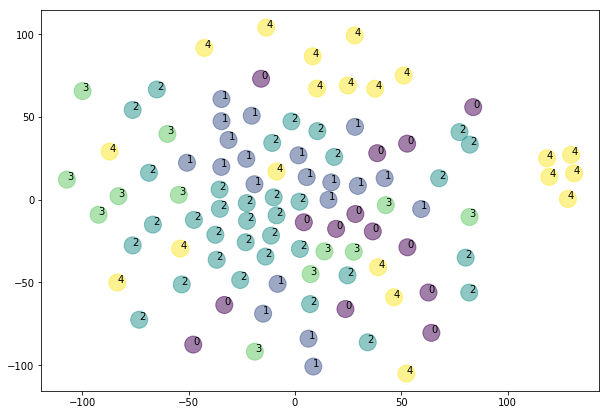

In [5]:
import gensim
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
import csv, sys
from numpy import zeros
from sklearn import cluster
from sklearn import metrics
  
# training data
sentences = []
with open('paul_cag.csv','r', encoding = 'utf-8') as f:
    for line in csv.reader(f, delimiter='\t'):
        tokenized_counter = [x.lower() for x in nltk.word_tokenize(line[0])]
        sentences.append(tokenized_counter)

model = Word2Vec(sentences, min_count=1)  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
print ("========================")
print (X)
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])
  
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
  
  
  
#for index, sentence in enumerate(sentences):    
#    print (str(assigned_clusters[index]) + ":" + str(sentence))
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
#print ("Cluster id labels for inputted data")
#print (labels)
#print ("Centroids data")
#print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
for j in range(len(sentences)):    
    plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
    print ("%s %s" % (assigned_clusters[j],  sentences[j]))
plt.show()

In [7]:
sentences[0:5]

[['\ufeffcasino',
  'is',
  'reason',
  'that',
  'people',
  'gamble',
  'and',
  'lose',
  'their',
  'savings'],
 ['losing',
  'their',
  'life',
  'savings',
  'there',
  'shouldnt',
  'be',
  'overemphasized'],
 ['french', 'is', "n't", 'a', 'humanity'],
 ['humanities', 'programs'],
 ['it',
  'does',
  'not',
  'mean',
  'either',
  'humanitarian',
  'programs',
  'or',
  'that',
  'they',
  'are',
  'needed']]